# Principal Component Analysis - [Real Estate Data Analysis]
## Problem Statement
### A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and others. The prices can be predicted more accurately if the number of predictors is less. Several dimension reduction techniques are being applied to decrease this number of predictors.
#
### Read the youtube data and perform exploratory data analysis. 

### 1. Importing Necessary Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

### 2. Importing Data

In [2]:
df=pd.read_csv('houseprice.csv',)

In [3]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


### 3. EDA

In [6]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
1355,1356,80,RL,102.0,10192,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,9,2006,WD,Normal,170000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
482,483,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,155000
843,844,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,141000
1151,1152,20,RL,134.0,17755,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,149900
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='count'>

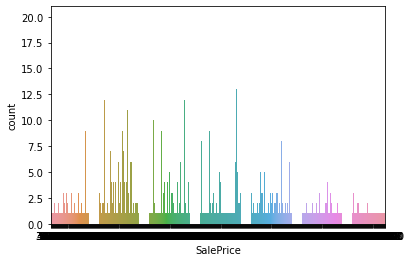

In [10]:
sns.countplot(x="SalePrice",data=df)

### Unbalanced Dataset

In [11]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

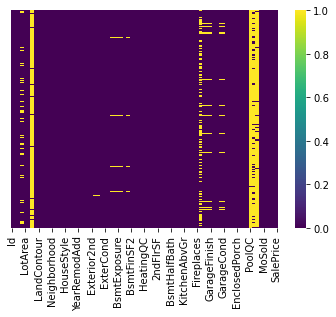

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

### Checking for NaN values

In [13]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
df['LotFrontage'].isnull().sum()

259

In [15]:
df.isnull().sum().sum()

6965

In [16]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum())

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF =

In [17]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

Id = 0 int64
MSSubClass = 0 int64
MSZoning = 0 object
LotFrontage = 259 float64
LotArea = 0 int64
Street = 0 object
LotShape = 0 object
LandContour = 0 object
Utilities = 0 object
LotConfig = 0 object
LandSlope = 0 object
Neighborhood = 0 object
Condition1 = 0 object
Condition2 = 0 object
BldgType = 0 object
HouseStyle = 0 object
OverallQual = 0 int64
OverallCond = 0 int64
YearBuilt = 0 int64
YearRemodAdd = 0 int64
RoofStyle = 0 object
RoofMatl = 0 object
Exterior1st = 0 object
Exterior2nd = 0 object
MasVnrType = 8 object
MasVnrArea = 8 float64
ExterQual = 0 object
ExterCond = 0 object
Foundation = 0 object
BsmtQual = 37 object
BsmtCond = 37 object
BsmtExposure = 38 object
BsmtFinType1 = 37 object
BsmtFinSF1 = 0 int64
BsmtFinType2 = 38 object
BsmtFinSF2 = 0 int64
BsmtUnfSF = 0 int64
TotalBsmtSF = 0 int64
Heating = 0 object
HeatingQC = 0 object
CentralAir = 0 object
Electrical = 1 object
1stFlrSF = 0 int64
2ndFlrSF = 0 int64
LowQualFinSF = 0 int64
GrLivArea = 0 int64
BsmtFullBath = 0 in

In [19]:
df['Electrical'].mode()[0]

'SBrkr'

In [20]:
for i in df.columns:
    if df[i].dtype in ["int64","float64"]:
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [21]:
df.isnull().sum().sum()

0

In [22]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

Id = 0 int64
MSSubClass = 0 int64
MSZoning = 0 object
LotFrontage = 0 float64
LotArea = 0 int64
Street = 0 object
LotShape = 0 object
LandContour = 0 object
Utilities = 0 object
LotConfig = 0 object
LandSlope = 0 object
Neighborhood = 0 object
Condition1 = 0 object
Condition2 = 0 object
BldgType = 0 object
HouseStyle = 0 object
OverallQual = 0 int64
OverallCond = 0 int64
YearBuilt = 0 int64
YearRemodAdd = 0 int64
RoofStyle = 0 object
RoofMatl = 0 object
Exterior1st = 0 object
Exterior2nd = 0 object
MasVnrType = 0 object
MasVnrArea = 0 float64
ExterQual = 0 object
ExterCond = 0 object
Foundation = 0 object
BsmtQual = 0 object
BsmtCond = 0 object
BsmtExposure = 0 object
BsmtFinType1 = 0 object
BsmtFinSF1 = 0 int64
BsmtFinType2 = 0 object
BsmtFinSF2 = 0 int64
BsmtUnfSF = 0 int64
TotalBsmtSF = 0 int64
Heating = 0 object
HeatingQC = 0 object
CentralAir = 0 object
Electrical = 0 object
1stFlrSF = 0 int64
2ndFlrSF = 0 int64
LowQualFinSF = 0 int64
GrLivArea = 0 int64
BsmtFullBath = 0 int64
Bsm

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [23]:
df_cat=df.copy()
for col in df_cat.columns:
    if df_cat[col].dtype!='object':
        df_cat.drop(col,inplace=True,axis=1)
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
LabEn=LabelEncoder()
encoded_df=df_cat.apply(LabelEncoder().fit_transform)
encoded_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [29]:
df_num=df.copy()
for col in df_num.columns:
    if df_num[col].dtype=='object':
        df_num.drop(col,inplace=True,axis=1)
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [31]:
dfs=[encoded_df,df_num]
final_df=PD.concat(dfs)
final_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

In [ ]:
for i in df.columns:
    if df[i].dtype in ["object"]:
        print(i)

In [ ]:
df

In [ ]:
df

In [ ]:
df[i].isnull().sum().sum()

In [ ]:
sns.heatmap(df.corr(),yticklabels=False,cmap="viridis")

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

### Working On Outliers

In [ ]:
def find_out(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_out(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes
#----------------------
bad_indexes=[]
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(df, col)
        bad_indexes.extend(outlierindexes)
print(f"All Bad indexes:{bad_indexes}")   

In [ ]:
from scipy import stats
data=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
sns.countplot(x="price_range",data=data)

In [ ]:
data

In [ ]:
df=data.reset_index(drop=True)

In [ ]:
df.columns

In [ ]:
sns.boxplot(df['battery_power'])

In [ ]:
sns.boxplot(df['ram'])

In [ ]:
df

In [ ]:
sns.countplot(x="talk_time",data=df)

In [ ]:
sns.countplot(x="clock_speed",data=df)

## See distribution for all numeric variables

In [ ]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

In [ ]:
f = pd.melt(df, id_vars=['price_range'],value_vars= numerical_features[numerical_features != 'price_range'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue")

In [ ]:
type(numerical_features)

## Check distribution of Diagnosis with respect to variable values

In [ ]:
# Generate a correlation matrix for all the numeric variables
corr=df[numerical_features].corr()
print(corr)

In [ ]:
corr=df.corr()["price_range"]
corr[np.argsort(corr)[::-1]]

In [ ]:
# Get correlation of numeric variables
df_numerical_features= df.select_dtypes(include=[np.number])

correlation= df_numerical_features.corr()
correlation["price_range"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,14))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)

# cmap - matplotlib colormap name or object - can be used to set the color options
# vmin & vmax is used to anchor the colormap
sns.heatmap(correlation, square= True, vmin=-0.2, vmax=0.8, cmap="YlGnBu")

In [ ]:
# Get correlation of numeric variables
numeric_features= df.select_dtypes(include= [np.number])

correlation= numeric_features.corr()
correlation["price_range"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Features with Diagnosis", y=1, size=20)
sns.heatmap(correlation, square= True, vmax=0.8, cmap="YlGnBu")

In [ ]:
# Zoomed Heat Map
k= 20
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)

# Pairplot of numeric variables
sns.set(style="ticks", color_codes=True)
columns= ['diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se',
       'symmetry_se', 'id', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave points_se', 'texture_mean',
       'symmetry_worst', 'smoothness_worst', 'texture_worst', 'area_se',
       'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean',
       'concavity_worst', 'concavity_mean', 'area_mean', 'radius_mean',
       'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean',
       'perimeter_worst', 'concave points_worst']
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=15, ncols=2, figsize=(15,75))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

## #1 With Standard Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='price_range',axis=1)
y=df[['price_range']]

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## #1.1 Gaussian Naive Bayes

### 6. Gaussian Naive Bayes Model Build

In [ ]:
GNB = GaussianNB()

### 7. Fit

In [ ]:
GNB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GNB.score(x_train,y_train)

In [ ]:
GNB.score(x_test,y_test)

In [ ]:
y_pred_train = GNB.predict(x_train)

In [ ]:
y_pred_test = GNB.predict(x_test)

In [ ]:
accuracy_score(y_train,y_pred_train)

In [ ]:
accuracy_score(y_test,y_pred_test)

## #1.2 Bernoulli Naive Bayes

### 6. Bernoulli Naive Bayes Model Build

In [ ]:
BNB=BernoulliNB()

### 7. Fit

In [ ]:
BNB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
BNB.score(x_train,y_train)

In [ ]:
BNB.score(x_test,y_test)

## #1.3 Multinomial Naive Bayes

### 6. Multinomial Naive Bayes Model Build

In [ ]:
MNB=MultinomialNB()

### 7. Fit

In [ ]:
MNB.fit(x_train, y_train)

#### Can't proceed further with Multinomial Naive Bayes Model because Negative values in data passed to MultinomialNB (input X)

## #2 Without Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='price_range',axis=1)
y=df[['price_range']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

## #2.1 Gaussian Naive B

### 6. Gaussian Naive Bayes Model Build

In [ ]:
GNB = GaussianNB()

### 7. Fit

In [ ]:
GNB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GNB.score(x_train,y_train)

In [ ]:
GNB.score(x_test,y_test)

## #2.2 Bernoulli Naive Bayes

### 6. Bernoulli Naive Bayes Model Build

In [ ]:
ADB= AdaBoostClassifier(n_estimators=100)

### 7. Fit

In [ ]:
ADB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
ADB.score(x_train,y_train)

In [ ]:
ADB.score(x_test,y_test)

## #2.3 Gradient Boosting

### 6. Gradient Boosting Model Build

In [ ]:
GBM=GradientBoostingClassifier(n_estimators = 50)

### 7. Fit

In [ ]:
GBM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GBM.score(x_train,y_train)

In [ ]:
GBM.score(x_test,y_test)

## #2.4 Extreme Gradient Boosting

### 6. Extreme Gradient Boosting Model Build

In [ ]:
XGB=xgb.XGBRegressor(n_estimators=50)

### 7. Fit

In [ ]:
XGB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
XGB.score(x_train,y_train)

In [ ]:
XGB.score(x_test,y_test)

### #3 With Min Max Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='diagnosis',axis=1)
y=df[['diagnosis']]

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## #3.1 Bagging

### 6. Bagging Classifier Model Build

In [ ]:
BCM = BaggingClassifier( n_estimators=50)

### 7. Fit

In [ ]:
BCM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
BCM.score(x_train,y_train)

In [ ]:
BCM.score(x_test,y_test)

## #3.2 AdaBoost

### 6. AdaBoost Model Build

In [ ]:
ADB= AdaBoostClassifier(n_estimators=100)

### 7. Fit

In [ ]:
ADB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
ADB.score(x_train,y_train)

In [ ]:
ADB.score(x_test,y_test)

## #3.3 Gradient Boosting

### 6. Gradient Boosting Model Build

In [ ]:
GBM=GradientBoostingClassifier(n_estimators = 50)

### 7. Fit

In [ ]:
GBM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GBM.score(x_train,y_train)

In [ ]:
GBM.score(x_test,y_test)

## #3.4 Extreme Gradient Boosting

### 6. Extreme Gradient Boosting Model Build

In [ ]:
XGB=xgb.XGBRegressor(n_estimators=50)

### 7. Fit

In [ ]:
XGB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
XGB.score(x_train,y_train)

In [ ]:
XGB.score(x_test,y_test)

### With Robust Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [ ]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [ ]:
SVM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
SVM.score(x_train,y_train)

In [ ]:
SVM.score(x_test,y_test)

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

### Cross Validation

### Without Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### 6. C[Finding the value of C]

from sklearn.model_selection import cross_val_score
from sklearn import metrics
C_Values=list(range(1,50,2))
cv_scores=[]
for k in C_Values:
    SVM = svm.SVC(kernel='linear',gamma='auto',C=k)
    scores=cross_val_score(SVM,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1-x for x in cv_scores]
MSE

optimal_k=C_Values[MSE.index(min(MSE))]
optimal_k

plt.plot(C_Values,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')